In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

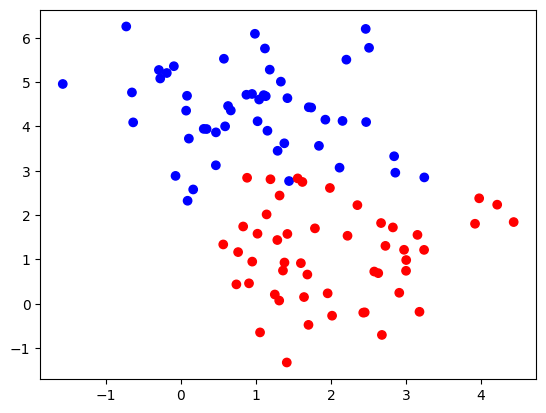

In [2]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))
plt.scatter(X[:,0], X[:, 1], c=y, cmap='bwr')

In [9]:
class RandriaLogisticReg:
    def initialisation(X):
        W=np.random.randn(X.shape[1],1)
        b=np.random.randn(1)
        return (W,b)
    def sigmoid(Z):
        return 1 / (1 + np.exp(-Z))
    def foward_prop(X,W,b):
        Z=X.dot(W)+b
        return RandriaLogisticReg.sigmoid(Z)
    def log_loss(A,y):
        return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))
    def gradients(X, A, y):
        dW = 1/len(y) * np.dot(X.T, A - y)
        db = 1/len(y) * np.sum(A - y)
        return (dW, db)
    def optimisation(X, W, b, A, y, learning_rate):
        dW, db = RandriaLogisticReg.gradients(X, A, y)
        W = W - learning_rate * dW
        b = b - learning_rate * db
        return (W, b)
    def predict(X, W, b):
        A = RandriaLogisticReg.foward_prop(X, W, b)
        return A >= 0.5
    def regression_logistique(X, y, learning_rate=0.1, n_iter=100):
  
        # Initialisation
        W, b = RandriaLogisticReg.initialisation(X)

        # Entrainement
        for i in range(n_iter):
            A = RandriaLogisticReg.foward_prop(X, W, b)
            W, b = RandriaLogisticReg.optimisation(X, W, b, A, y, learning_rate=0.1)
        return (W,b)

In [10]:
RandriaLogisticReg.regression_logistique(X,y,0.1,100)

AttributeError: type object 'RandriaLogisticReg' has no attribute 'forward_propagation'